In [1]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
file_path = Path("Sleep_health_and_lifestyle_dataset.csv")

In [2]:
sleep_health_and_lifestyle_part_1 = pd.read_csv(file_path, encoding="UTF-8")
sleep_health_and_lifestyle_part_1.sort_values("Age")
sleep_health_and_lifestyle_part_1

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [3]:
#sleep_health_and_lifestyle.count()

In [4]:
sleep_health_and_lifestyle_part_1 = sleep_health_and_lifestyle_part_1.fillna('None')
sleep_health_and_lifestyle_part_1

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [5]:
sleep_health_and_lifestyle_part_1.count()

Person ID                  374
Gender                     374
Age                        374
Occupation                 374
Sleep Duration             374
Quality of Sleep           374
Physical Activity Level    374
Stress Level               374
BMI Category               374
Blood Pressure             374
Heart Rate                 374
Daily Steps                374
Sleep Disorder             374
dtype: int64

In [6]:
combined_cleaned_df = sleep_health_and_lifestyle_part_1.drop_duplicates()
print(combined_cleaned_df.count())

Person ID                  374
Gender                     374
Age                        374
Occupation                 374
Sleep Duration             374
Quality of Sleep           374
Physical Activity Level    374
Stress Level               374
BMI Category               374
Blood Pressure             374
Heart Rate                 374
Daily Steps                374
Sleep Disorder             374
dtype: int64


In [7]:
occupations = combined_cleaned_df['Occupation'].value_counts()

In [8]:
occupations.count()

11

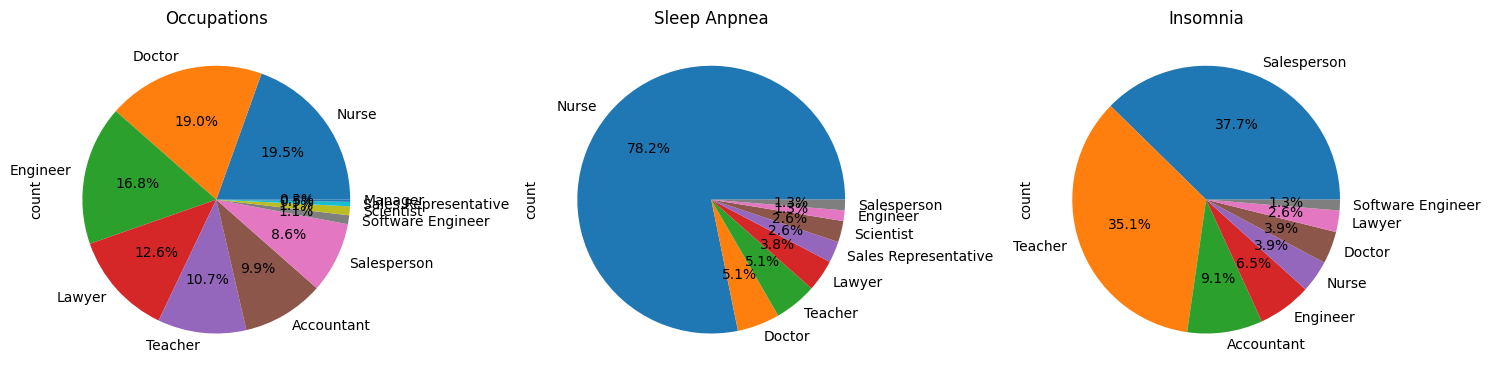

In [9]:
sleep_apnea = combined_cleaned_df[combined_cleaned_df['Sleep Disorder'] == 'Sleep Apnea']
insomnia = combined_cleaned_df[combined_cleaned_df['Sleep Disorder'] == 'Insomnia']
occupations_sleep_apnea = sleep_apnea['Occupation'].value_counts()
occupations_insomnia = insomnia['Occupation'].value_counts()
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
occupations.plot(kind='pie', ax=axs[0], title='Occupations', autopct='%1.1f%%')
occupations_sleep_apnea.plot(kind = 'pie', ax=axs[1], title = 'Sleep Anpnea', autopct='%1.1f%%')
occupations_insomnia.plot(kind = 'pie', ax=axs[2], title = 'Insomnia', autopct='%1.1f%%')
plt.tight_layout()
plt.savefig("figures/Fig1.png")
plt.show()

In [10]:
total = len(combined_cleaned_df)
occupations = combined_cleaned_df.Occupation.unique()
values = []
for occupation in occupations:
    count = 0
    for index, row in combined_cleaned_df.iterrows():
        if row['Occupation'] == occupation:
            count = count + 1
    values.append(count)

In [11]:
occupation_categories = []
occupation_values = []
other_total = 0
percentages = [(value / total) * 100 for value in values]
for i, percentage in enumerate(percentages):
    if percentage >= 4:
        occupation_categories.append(occupations[i])
        occupation_values.append(values[i])
    else:
        other_total += values[i]

# Add 'Other' category if necessary
if other_total > 0:
    occupation_categories.append('Other')
    occupation_values.append(other_total)

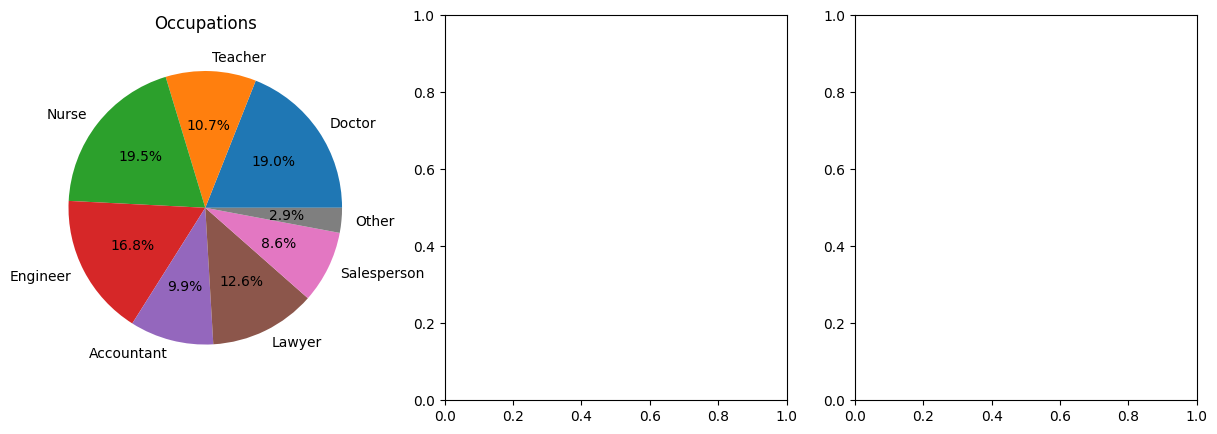

In [12]:
# Create pie chart
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].pie(occupation_values, labels=occupation_categories, autopct='%1.1f%%')
axs[0].set_title('Occupations')
plt.show()

In [13]:
sleep_apnea = combined_cleaned_df[combined_cleaned_df['Sleep Disorder'] == 'Sleep Apnea']
total = len(sleep_apnea)
occupations = sleep_apnea.Occupation.unique()
values = []
for occupation in occupations:
    count = 0
    for index, row in sleep_apnea.iterrows():
        if row['Occupation'] == occupation:
            count = count + 1
    values.append(count)

In [14]:
sleep_apnea_categories = []
sleep_apnea_values = []
other_total = 0
percentages = [(value / total) * 100 for value in values]
for i, percentage in enumerate(percentages):
    if percentage >= 4:
        sleep_apnea_categories.append(occupations[i])
        sleep_apnea_values.append(values[i])
    else:
        other_total += values[i]

# Add 'Other' category if necessary
if other_total > 0:
    sleep_apnea_categories.append('Other')
    sleep_apnea_values.append(other_total)

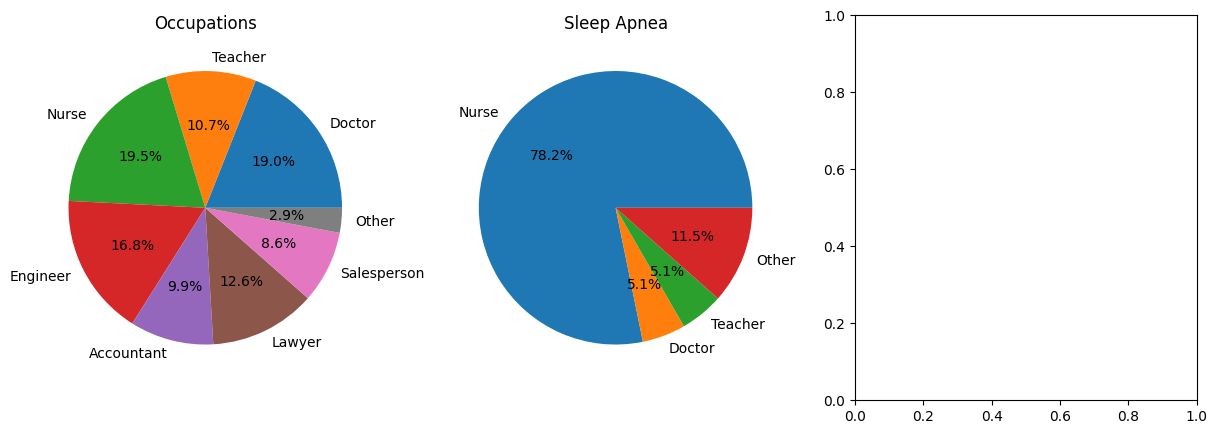

In [15]:
# Create pie chart
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].pie(occupation_values, labels=occupation_categories, autopct='%1.1f%%')
axs[0].set_title('Occupations')
axs[1].pie(sleep_apnea_values, labels=sleep_apnea_categories, autopct='%1.1f%%')
axs[1].set_title('Sleep Apnea')
plt.show()

In [16]:
insomnia = combined_cleaned_df[combined_cleaned_df['Sleep Disorder'] == 'Insomnia']
total = len(insomnia)
occupations = insomnia.Occupation.unique()
values = []
for occupation in occupations:
    count = 0
    for index, row in insomnia.iterrows():
        if row['Occupation'] == occupation:
            count = count + 1
    values.append(count)

In [17]:
insomnia_categories = []
insomnia_values = []
other_total = 0
percentages = [(value / total) * 100 for value in values]
for i, percentage in enumerate(percentages):
    if percentage >= 4:
        insomnia_categories.append(occupations[i])
        insomnia_values.append(values[i])
    else:
        other_total += values[i]

# Add 'Other' category if necessary
if other_total > 0:
    insomnia_categories.append('Other')
    insomnia_values.append(other_total)

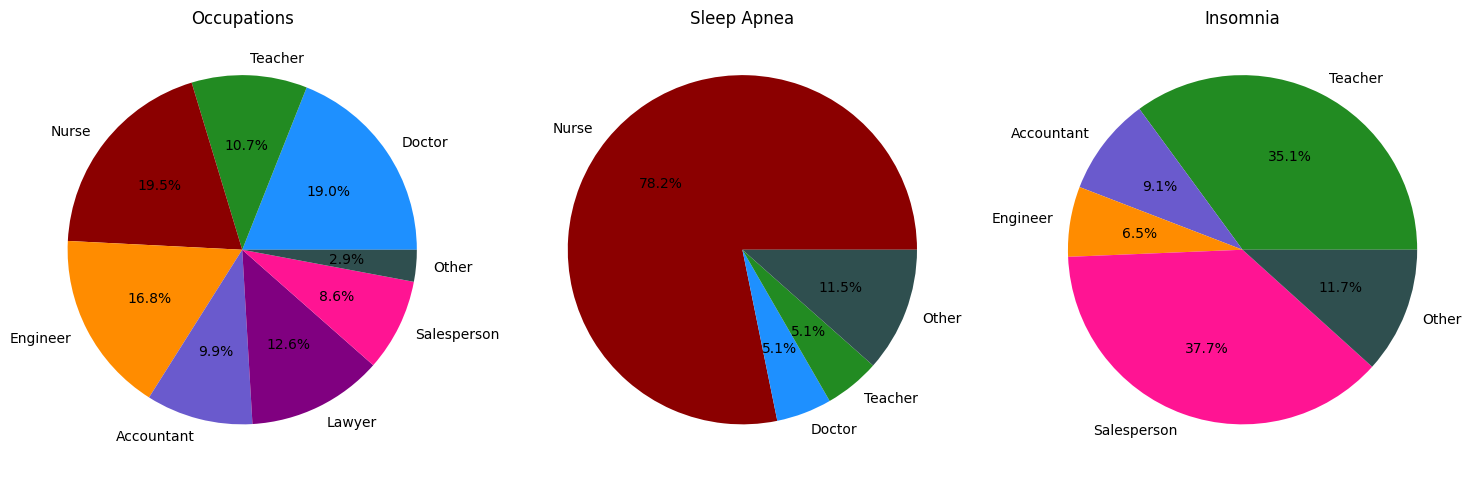

In [18]:
# Create a dictionary mapping labels to specific darker colors
color_mapping = {
    'Nurse': '#8B0000',  # Dark Red
    'Doctor': '#1E90FF',  # Dodger Blue
    'Teacher': '#228B22',  # Forest Green
    'Engineer': '#FF8C00',  # Dark Orange
    'Accountant': '#6A5ACD',  # Slate Blue
    'Lawyer': '#800080',  # Purple
    'Salesperson': '#FF1493',  # Deep Pink
    'Other': '#2F4F4F'        # Dark Slate Gray
}

# Function to get the color list based on labels
def get_colors(labels):
    return [color_mapping[label] for label in labels]

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# First pie chart
axs[0].pie(occupation_values, labels=occupation_categories, autopct='%1.1f%%', colors=get_colors(occupation_categories))
axs[0].set_title('Occupations')

# Second pie chart
axs[1].pie(sleep_apnea_values, labels=sleep_apnea_categories, autopct='%1.1f%%', colors=get_colors(sleep_apnea_categories))
axs[1].set_title('Sleep Apnea')

# Third pie chart
axs[2].pie(insomnia_values, labels=insomnia_categories, autopct='%1.1f%%', colors=get_colors(insomnia_categories))
axs[2].set_title('Insomnia')
plt.tight_layout()
plt.savefig("figures/Fig1.png")
plt.show()


<Axes: xlabel='Sleep Duration', ylabel='Stress Level'>

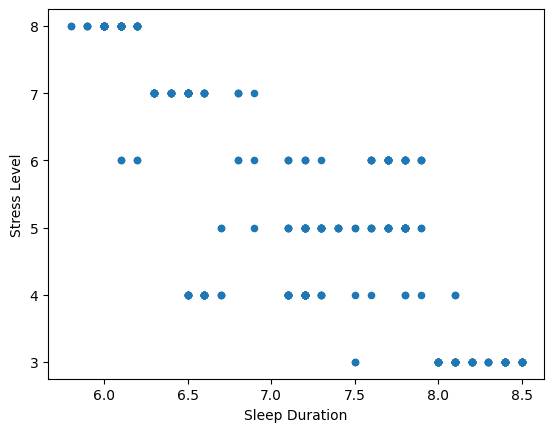

In [19]:
combined_cleaned_df.plot.scatter(x = 'Sleep Duration', y = 'Stress Level')

<Axes: xlabel='Sleep Duration', ylabel='BMI Category'>

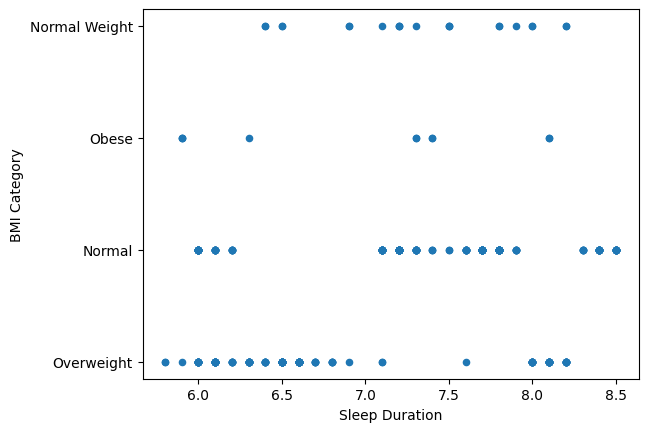

In [20]:
combined_cleaned_df.plot.scatter(x = 'Sleep Duration', y = 'BMI Category')

<Axes: xlabel='Sleep Duration', ylabel='Daily Steps'>

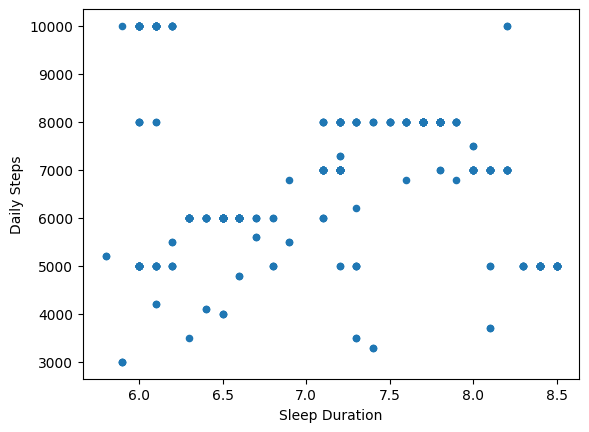

In [21]:
combined_cleaned_df.plot.scatter(x = 'Sleep Duration', y = 'Daily Steps')

<Axes: xlabel='Sleep Duration', ylabel='Sleep Disorder'>

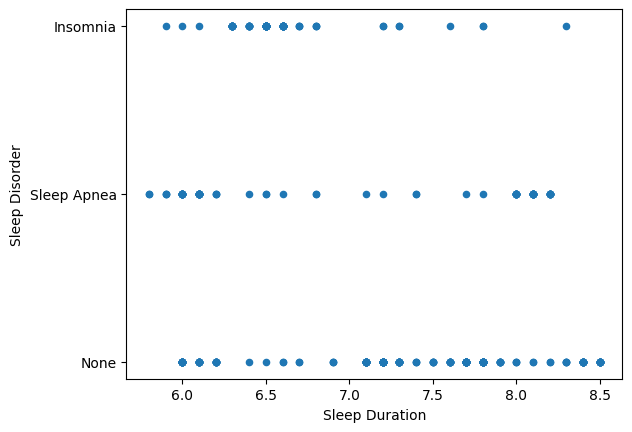

In [22]:
combined_cleaned_df.plot.scatter(x = 'Sleep Duration', y = 'Sleep Disorder')

<Axes: xlabel='Sleep Duration', ylabel='Occupation'>

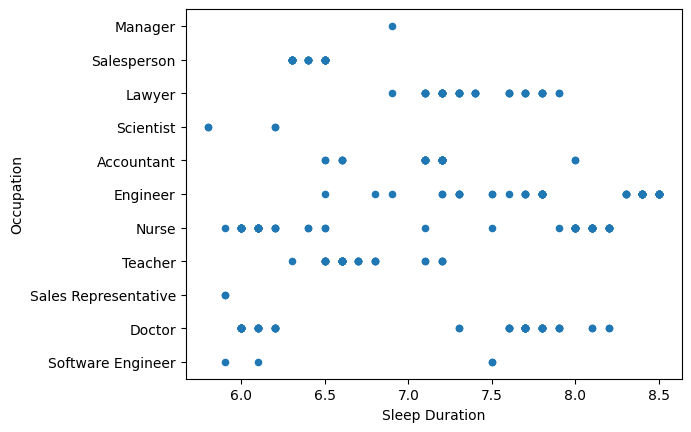

In [23]:
combined_cleaned_df.plot.scatter(x = 'Sleep Duration', y = 'Occupation')

In [24]:
occ_sleep_duration = combined_cleaned_df.groupby('Occupation')['Sleep Duration'].mean()

In [25]:
occ_sleep_duration = occ_sleep_duration.sort_values(ascending = False)

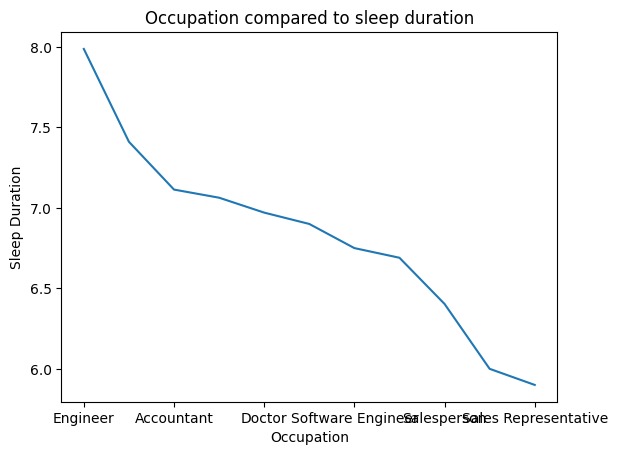

In [26]:
occ_sleep_duration.plot(kind = 'line', ylabel = 'Sleep Duration', title = 'Occupation compared to sleep duration')
plt.savefig("figures/Fig2.png")

In [27]:
occ_sleep_duration

Occupation
Engineer                7.987302
Lawyer                  7.410638
Accountant              7.113514
Nurse                   7.063014
Doctor                  6.970423
Manager                 6.900000
Software Engineer       6.750000
Teacher                 6.690000
Salesperson             6.403125
Scientist               6.000000
Sales Representative    5.900000
Name: Sleep Duration, dtype: float64

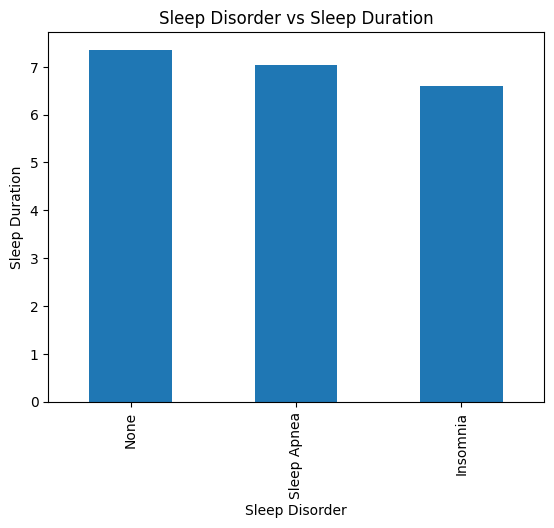

In [28]:
df = combined_cleaned_df.groupby('Sleep Disorder')['Sleep Duration'].mean()
df = df.sort_values(ascending = False)
df.plot(kind = 'bar', ylabel = 'Sleep Duration', title = 'Sleep Disorder vs Sleep Duration')
plt.savefig("figures/Fig3.png")

In [29]:
df = pd.concat([occ_sleep_duration, df])

In [30]:
df

Engineer                7.987302
Lawyer                  7.410638
Accountant              7.113514
Nurse                   7.063014
Doctor                  6.970423
Manager                 6.900000
Software Engineer       6.750000
Teacher                 6.690000
Salesperson             6.403125
Scientist               6.000000
Sales Representative    5.900000
None                    7.358447
Sleep Apnea             7.032051
Insomnia                6.589610
Name: Sleep Duration, dtype: float64

<Axes: xlabel='BMI Category'>

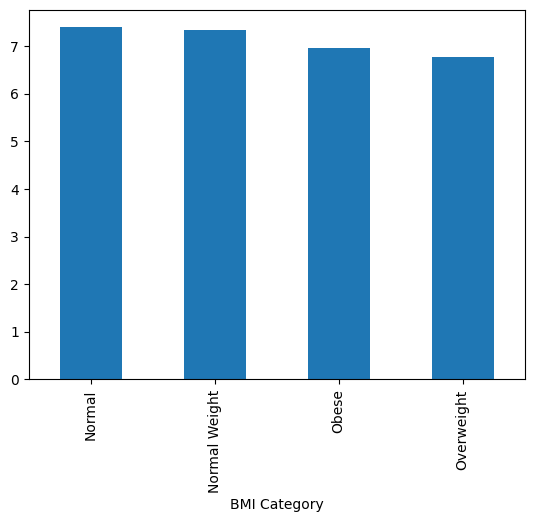

In [32]:
df = combined_cleaned_df.groupby('BMI Category')['Sleep Duration'].mean()
df = df.sort_values(ascending = False)
df.plot.bar()

<Axes: xlabel='Stress Level'>

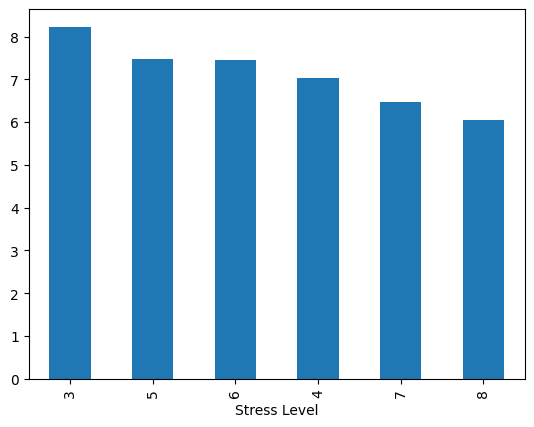

In [33]:
stress = combined_cleaned_df.groupby('Stress Level')['Sleep Duration'].mean()
stress = stress.sort_values(ascending = False)
stress.plot.bar()

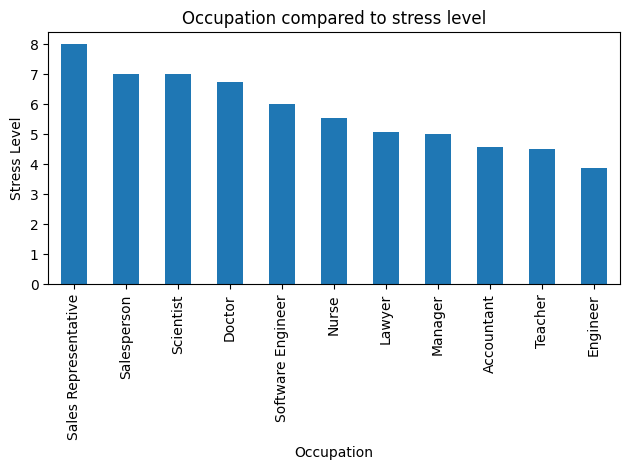

In [34]:
occ_stress = combined_cleaned_df.groupby('Occupation')['Stress Level'].mean()
occ_stress = occ_stress.sort_values(ascending = False)
occ_stress.plot(kind = 'bar', ylabel = 'Stress Level', title = 'Occupation compared to stress level')
plt.tight_layout()
plt.savefig("figures/Fig4.png")

In [35]:
sleep_stress_occ_df = pd.concat([occ_sleep_duration, occ_stress], axis = 1)

In [36]:
sleep_stress_occ_df

,Sleep Duration,Stress Level
Occupation,,
Engineer,7.987302,3.888889
Lawyer,7.410638,5.063830
Accountant,7.113514,4.594595
Nurse,7.063014,5.547945
Doctor,6.970423,6.732394
Manager,6.900000,5.000000
Software Engineer,6.750000,6.000000
Teacher,6.690000,4.525000
Salesperson,6.403125,7.000000


In [37]:
ax=sleep_stress_occ_df.index.values
print(ax)

['Engineer' 'Lawyer' 'Accountant' 'Nurse' 'Doctor' 'Manager'
 'Software Engineer' 'Teacher' 'Salesperson' 'Scientist'
 'Sales Representative']


ConversionError: Failed to convert value(s) to axis units: array(['Engineer', 'Lawyer', 'Accountant', 'Nurse', 'Doctor', 'Manager',
       'Software Engineer', 'Teacher', 'Salesperson', 'Scientist',
       'Sales Representative'], dtype=object)

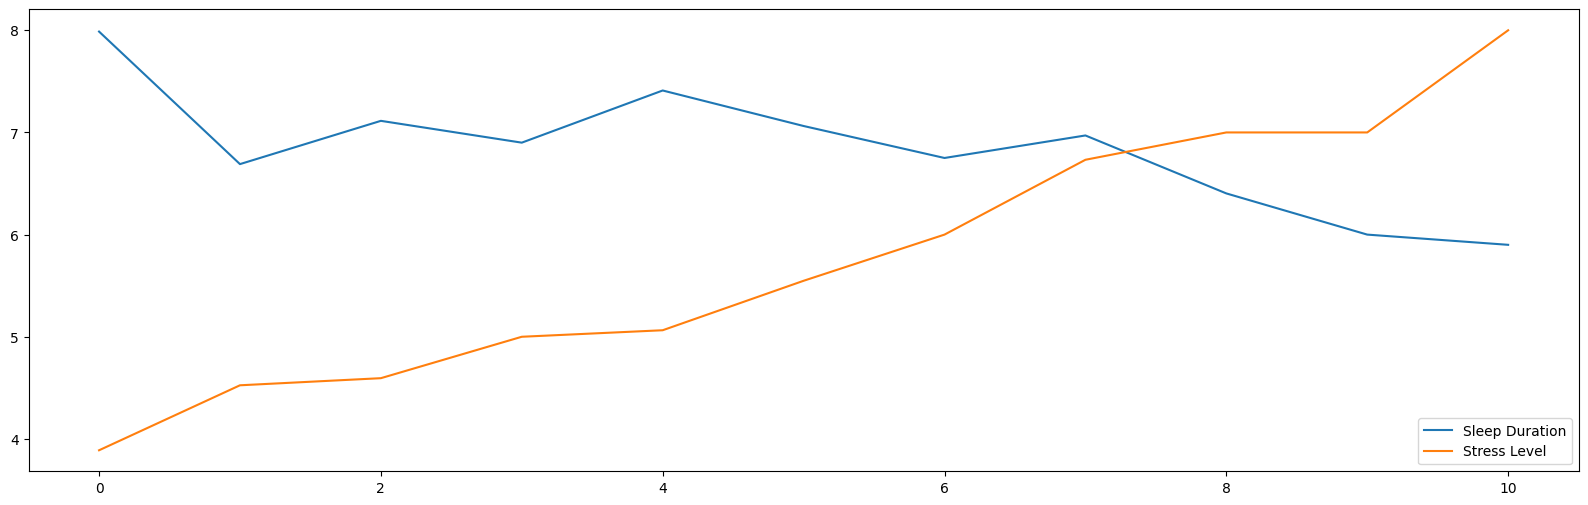

In [38]:
import matplotlib.pyplot as plt

# Plotting the DataFrame
sleep_stress_occ_df = sleep_stress_occ_df.sort_values(by = 'Stress Level')
sleep_stress_occ_df.plot(kind='line', figsize=(20,6), xticks = ax)
plt.xticks()

# Show the plot
plt.show()


In [ ]:
sleep_stress_occ_df = sleep_stress_occ_df.sort_values(by = 'Stress Level')
# Create figure and axis
fig, ax = plt.subplots(figsize=(20, 6))

# Plot the DataFrame using the index as x-axis
sleep_stress_occ_df.plot(kind='line', ax=ax)

# Set x-ticks to use the word-based index
ax.set_xticks(range(len(sleep_stress_occ_df)))  # Ensure ticks for each word
ax.set_xticklabels(sleep_stress_occ_df.index, rotation=45, ha='right')  # Use words as labels
plt.savefig("figures/Fig11.png", bbox_inches='tight')
# Show the plot
plt.show()

<Axes: xlabel='Sleep Duration', ylabel='Stress Level'>

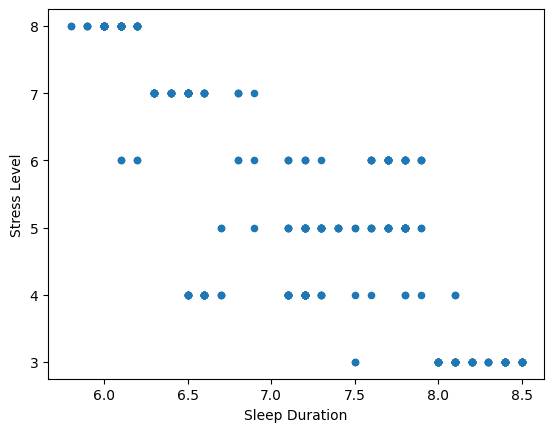

In [39]:
combined_cleaned_df.plot.scatter(x = 'Sleep Duration', y = 'Stress Level')

In [43]:
# Define a function to create Linear Regression plots
def regress_line (x, y, x_name, y_name, title):
    dict = {x_name: x,
            y_name: y}
    df = pd.DataFrame(dict)
    correlation_coefficient, p_value = st.pearsonr(x, y)
    print("The r^2 value is " + str((correlation_coefficient * correlation_coefficient)))
    print(p_value)
    slope, intercept = np.polyfit(x, y, 1)
    df.plot.scatter(x = x_name, y = y_name)
    plt.title(title)
    x_min, x_max = plt.xlim()
    y_min, y_max = plt.ylim()
    x_position = x_min + 0.1 * (x_max - x_min)
    y_position = y_max - 0.1 * (y_max - y_min)
    plt.text(x_position, y_position, f'y = {round(slope,2)}x + {round(intercept,2)}', color='red', fontsize=12)
    plt.plot(x, slope * x + intercept, color='red')
    plt.savefig("figures/fig6")

The r^2 value is 0.657758351774422
1.2378076181537591e-88


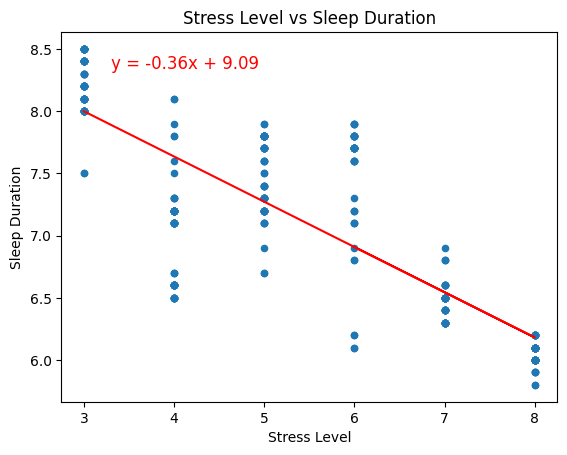

In [44]:
regress_line(combined_cleaned_df['Stress Level'], combined_cleaned_df['Sleep Duration'], 'Stress Level', 'Sleep Duration', title="Stress Level vs Sleep Duration")

The r^2 value is 0.8077552132338894
2.880124240943373e-135


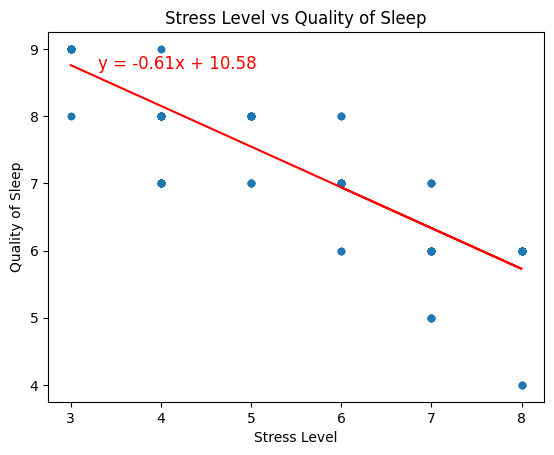

In [45]:
regress_line(combined_cleaned_df['Stress Level'], combined_cleaned_df['Quality of Sleep'], 'Stress Level', 'Quality of Sleep', title="Stress Level vs Quality of Sleep")

In [ ]:
regress_line(combined_cleaned_df['Sleep Duration'], combined_cleaned_df['Daily Steps'], 'Daily Steps', 'Sleep Durations', title="Daily Steps vs Sleep Duration")

In [ ]:
regress_line(combined_cleaned_df['Heart Rate'], combined_cleaned_df['Daily Steps'], 'Daily Steps', 'Sleep Durations', title="Daily Steps vs Sleep Duration")

In [ ]:
regress_line(combined_cleaned_df['Sleep Duration'], combined_cleaned_df['Physical Activity Level'], 'Daily Steps', 'Sleep Durations', title="Daily Steps vs Sleep Duration")